### Welcome to HyperBinding. We can help you slice your protein into fragments with desirable length and predicate their binding affinity to HLA-A-02. 

In [1]:
print('Please enter your protein sequence')
sequence = input()

Please enter your protein sequence
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQ

In test, we can use: <br>
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT

In [2]:
print('Please enter the length of your sliced fragments')
length = int(input())

Please enter the length of your sliced fragments
8


In [3]:
print('Please enter which class of binding you want to see:')
print('for very strong binder, kd<=30nM, please enter 0')
print('for strong binder, 50nM<kd<=500nM, please enter 1')
print('for medium binder, 500nM<kd<=10000nM, please enter 2')
print('for weak binder, 10000nM<kd<=20000nM, please enter 3')
print('for very weak binder, kd>20000nM, please enter 4')
index = int(input())

Please enter which class of binding you want to see:
for very strong binder, kd<=30nM, please enter 0
for strong binder, 50nM<kd<=500nM, please enter 1
for medium binder, 500nM<kd<=10000nM, please enter 2
for weak binder, 10000nM<kd<=20000nM, please enter 3
for very weak binder, kd>20000nM, please enter 4
0


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

Using TensorFlow backend.


In [7]:
import sys
sys.path.append("../..")
from hyperbinding import multiple_channel_matrix_generator
from hyperbinding import peptide_cutter
from hyperbinding import single_peptide_convert

In [8]:
model = load_model('../model_fitting/multi_class_CNN_model.h5')

In [9]:
cuts = peptide_cutter.cutter(sequence,length)

In [10]:
sequences = []
for pp in cuts:
    sequences.append(single_peptide_convert.peptide_converter(pp))

In [11]:
predict = []
for pp in sequences:
    matrix = multiple_channel_matrix_generator.multiple_channel_generator(pp)
    matrix = matrix.reshape((1,12,21,3))
    pre = model.predict(matrix)[0].argmax()
    predict.append(pre)

In [12]:
label_list = np.zeros(5)
for label in predict:
    if label == 0:
        label_list[0] += 1
    elif label == 1:
        label_list[1] += 1
    elif label == 2:
        label_list[2] += 1
    elif label == 3:
        label_list[3] += 1
    else:
        label_list[4] += 1

In [13]:
labels = ['Very strong', 'Strong', 'Medium', 'Weak', 'Very weak']

Your protein sequence is:
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAIS

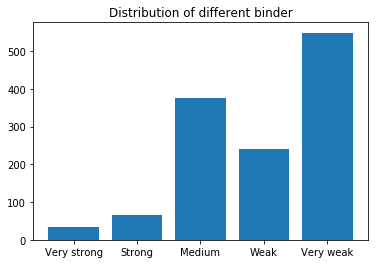

The fragments of Very strong binders are shown below
MFVFLVLL
FLVLLPLV
VLLPLVSS
SFTRGVYY
KVFRSSVL
DLFLPFFS
FFSNVTWF
RFDNPVLP
FQFCNDPF
DPFLGVYY
CTFEYVSQ
FLMDLEGK
GFSALEPL
YLTPGDSS
YYVGYLQP
YVGYLQPR
YLQPRTFL
YQAGSTPC
ELLHAPAT
FNFNGLTG
CSFGGVSV
YQDVNCTE
YTMSLGAE
FTISVTTE
FSQILPDP
GLTVLPPL
YTSALLAG
WTFGAGAA
KLQDVVNQ
HLMSFPQS
MSFPQSAP
FLHVTYVP
GTHWFVTQ
YIKWPWYI
FIAGLIAI


In [14]:
print('Your protein sequence is:')
print(sequence)
print('Your protein will be sliced into',length,'-mers, total', len(cuts))
print('Below are your result summary:')


plt.bar(labels,label_list)
plt.title('Distribution of different binder')
plt.show()

print('The fragments of',labels[index],'binders are shown below')
for i in range(len(cuts)):
    if predict[i] == index:
        print(cuts[i])
    else:
        continue